<a href="https://colab.research.google.com/github/Eezzeldin/POC/blob/RandomSearch_PP_Models/Profit_ML_V5_run0ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pip install gplearn

In [2]:
#pip install tqdm

In [2]:
'''
from gplearn.genetic import SymbolicRegressor, SymbolicTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Generating some synthetic data for demonstration
# For example, let's try to discover the relationship y = x^2 - x + 1
X = np.linspace(-1, 1, 100).reshape(-1, 1)
y = X**2 - X + 1 + np.random.randn(*X.shape) * 0.1

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the symbolic regressor
est_gp = SymbolicRegressor(population_size=5000,
                           generations=3, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0 ,n_jobs=-1)
est_gp.fit(X_train, y_train)

# Making predictions
y_pred = est_gp.predict(X_test)

# Evaluating the model
print("Model expression:", est_gp._program)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
'''


'\nfrom gplearn.genetic import SymbolicRegressor, SymbolicTransformer\n\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import mean_squared_error\nimport numpy as np\n\n# Generating some synthetic data for demonstration\n# For example, let\'s try to discover the relationship y = x^2 - x + 1\nX = np.linspace(-1, 1, 100).reshape(-1, 1)\ny = X**2 - X + 1 + np.random.randn(*X.shape) * 0.1\n\n# Splitting data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)\n\n# Creating and training the symbolic regressor\nest_gp = SymbolicRegressor(population_size=5000,\n                           generations=3, stopping_criteria=0.01,\n                           p_crossover=0.7, p_subtree_mutation=0.1,\n                           p_hoist_mutation=0.05, p_point_mutation=0.1,\n                           max_samples=0.9, verbose=1,\n                           parsimony_coefficient=0.01, random_state=0 ,n_job

In [1]:
import pandas as pd
import numpy as np

import random

from gplearn.genetic import SymbolicRegressor, SymbolicTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

import matplotlib.pyplot as plt

In [4]:
'''
+The reason an MMC  has the Profit it does is :
- price, TIV decay
- R2 TIV , R2 Price

- Confidence measure : number of points.

- Year of Release (candidate for removal)

+missing from analysis :
TIV Launch price

+grouping variable    : Launch Price Bins.
+granularity variable : MMC
'''

'\n+The reason an MMC  has the Profit it does is :\n- price, TIV decay\n- R2 TIV , R2 Price\n\n- Confidence measure : number of points.\n\n- Year of Release (candidate for removal)\n\n+missing from analysis :\nTIV Launch price\n\n+grouping variable    : Launch Price Bins.\n+granularity variable : MMC\n'

In [5]:
input_file_path    = "/content/profit_pred_3.csv"

col_rename_dict = {
    "Launch Price (bin)"   : "LPB" ,
    'Avg. Launch Price'    : "LP"  ,
    "Avg. Launch TIV"      : "LTIV",
    "Model Memory Carrier" : "MMC" ,
    "Year of Release Date" : "Year",
    "Avg. Point Count 1000": "PC"  ,
    "Avg. Price decay"     : "Price_Decay",
    "Avg. Price rsquared"  : "Price_R2"  ,
    "Avg. TIV decay"       : "TIV_Decay" ,
    "Avg. TIV rsquared"    : "TIV_R2",
}

not_Features           = ["Profit" , "MMC" ,"PC"]
Target                 = "Profit"
pred_col_name          = "Profit_Pred"

scaler_dict            = {}
interaction_1_name     = "Price_Decay_R2"
interaction_1_terms    = ["Price_R2" , "Price_Decay"]

grouping_col           = "LPB" # .astype("category")

number_of_test_per_fold = 1
fold_y_pred             = "fold_y_pred"
fold_test_index         = "fold_test_index"
fold_num                = 'fold_num'
fold_y_g_pred           = "fold_y_g_pred"

interaction       = True
one_hot           = True
scale_features    = True
drop_grouping_var = True
Kfold_symbolic    = True


#winner
generations=100
population_size=4000
hall_of_fame=200
n_components=10

#winner
generations=200 # * 2
population_size=8000 # * 2
hall_of_fame=100
n_components = 30
function_set_trans = ['add', 'sub', 'mul', 'div',
'sqrt', 'log', 'abs', 'neg', 'inv',
'max', 'min']
parsimony_coefficient_trans = 0.0005

#winner
generations=10 # * 2
population_size=800 # * 2
hall_of_fame = 200
n_components = 50
function_set_trans = ['add', 'sub', 'mul', 'div',
'sqrt', 'log', 'abs', 'neg', 'inv',
'max', 'min']
parsimony_coefficient_trans = 0.0005


#competitor
generations=10 # * 2
population_size=800 # * 2
hall_of_fame = 200
n_components = 50
function_set_trans = ['add', 'sub', 'mul', 'div',
'sqrt', 'log', 'abs', 'neg', 'inv',
'max', 'min']
parsimony_coefficient_trans = 0.0005


In [6]:
data_input  = pd.read_csv (input_file_path)
data_input.head ()

,Launch Price (bin),Model Memory Carrier,Year of Release Date,Avg. Launch Price,Avg. Launch TIV,Avg. Point Count 1000,Avg. Price decay,Avg. Price rsquared,Avg. TIV decay,Avg. TIV rsquared,Profit
0,1000,iPhone XS Max_512GB_Verizon,2018,1029.35,656.816,19,-0.001192,0.894662,-0.001335,0.879887,41381
1,1000,iPhone XS Max_512GB_Unlocked,2018,1014.39,634.388,20,-0.001009,0.911918,-0.001326,0.918513,227473
2,1000,iPhone XS Max_256GB_Unlocked,2018,1008.15,602.997,20,-0.001031,0.915380,-0.001333,0.932912,1514777
3,1000,iPhone X_256GB_Verizon,2017,1011.38,602.270,19,-0.001220,0.958448,-0.001388,0.895701,126462
4,900,iPhone XS Max_256GB_Verizon,2018,982.38,562.836,20,-0.001070,0.891031,-0.001114,0.860168,199737


In [7]:
data_input.shape

(114, 11)

In [8]:
data_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Launch Price (bin)     114 non-null    int64  
 1   Model Memory Carrier   114 non-null    object 
 2   Year of Release Date   114 non-null    int64  
 3   Avg. Launch Price      114 non-null    float64
 4   Avg. Launch TIV        114 non-null    float64
 5   Avg. Point Count 1000  114 non-null    int64  
 6   Avg. Price decay       114 non-null    float64
 7   Avg. Price rsquared    114 non-null    float64
 8   Avg. TIV decay         114 non-null    float64
 9   Avg. TIV rsquared      114 non-null    float64
 10  Profit                 114 non-null    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 9.9+ KB


In [9]:
data_input.columns

Index(['Launch Price (bin)', 'Model Memory Carrier', 'Year of Release Date',
       'Avg. Launch Price', 'Avg. Launch TIV', 'Avg. Point Count 1000',
       'Avg. Price decay', 'Avg. Price rsquared', 'Avg. TIV decay',
       'Avg. TIV rsquared', 'Profit'],
      dtype='object')

In [10]:
data_input.rename (col_rename_dict,axis =1 ,inplace=True)
data_input.head()

,LPB,MMC,Year,LP,LTIV,PC,Price_Decay,Price_R2,TIV_Decay,TIV_R2,Profit
0,1000,iPhone XS Max_512GB_Verizon,2018,1029.35,656.816,19,-0.001192,0.894662,-0.001335,0.879887,41381
1,1000,iPhone XS Max_512GB_Unlocked,2018,1014.39,634.388,20,-0.001009,0.911918,-0.001326,0.918513,227473
2,1000,iPhone XS Max_256GB_Unlocked,2018,1008.15,602.997,20,-0.001031,0.915380,-0.001333,0.932912,1514777
3,1000,iPhone X_256GB_Verizon,2017,1011.38,602.270,19,-0.001220,0.958448,-0.001388,0.895701,126462
4,900,iPhone XS Max_256GB_Verizon,2018,982.38,562.836,20,-0.001070,0.891031,-0.001114,0.860168,199737


In [11]:
data_input [grouping_col] = data_input [grouping_col].astype("category")

In [12]:
#data_input [interaction_1_name] = data_input [interaction_1_terms [0]]  * data_input [interaction_1_terms [1]]

In [13]:
X = data_input.drop (not_Features , axis=1)
y =  data_input [Target]

In [14]:
X.head ( )

,LPB,Year,LP,LTIV,Price_Decay,Price_R2,TIV_Decay,TIV_R2
0,1000,2018,1029.35,656.816,-0.001192,0.894662,-0.001335,0.879887
1,1000,2018,1014.39,634.388,-0.001009,0.911918,-0.001326,0.918513
2,1000,2018,1008.15,602.997,-0.001031,0.915380,-0.001333,0.932912
3,1000,2017,1011.38,602.270,-0.001220,0.958448,-0.001388,0.895701
4,900,2018,982.38,562.836,-0.001070,0.891031,-0.001114,0.860168


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   LPB          114 non-null    category
 1   Year         114 non-null    int64   
 2   LP           114 non-null    float64 
 3   LTIV         114 non-null    float64 
 4   Price_Decay  114 non-null    float64 
 5   Price_R2     114 non-null    float64 
 6   TIV_Decay    114 non-null    float64 
 7   TIV_R2       114 non-null    float64 
dtypes: category(1), float64(6), int64(1)
memory usage: 6.8 KB


In [16]:
test_size      = int  (X.shape [0] * 0.3)
test_indicies  = X.sample (test_size).index.values
train_indicies = [i for i in X.index if i not in test_indicies]

X_train       = X.loc [train_indicies]
X_test        = X.loc [test_indicies]
y_train       = y.loc [train_indicies]
y_test        = y.loc [test_indicies]

In [20]:
scaler_dict  [Target] = StandardScaler().fit (y_train.values.reshape (-1,1))
y_train_scaled = scaler_dict  [Target].transform (y_train.values.reshape (-1,1))

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from gplearn.genetic import SymbolicTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge



# Define the polynomial features followed by MinMax scaling part of the pipeline
poly_minmax_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('minmax_scaler', MinMaxScaler())
])

# FeatureUnion to combine PolynomialFeatures + MinMaxScaler and SymbolicTransformer
combined_features = FeatureUnion([
    ("poly_minmax", poly_minmax_pipeline),
    ("symbolic_transform", SymbolicTransformer(generations=20, population_size=2000,
                                                 hall_of_fame=100, n_components=10,
                                                 function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 'inv', 'max', 'min'),
                                                 parsimony_coefficient=0.0005, max_samples=0.9, verbose=1)),
])

'''
# Final pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('features', combined_features),
    ('linear_regression', LinearRegression())
])
'''

# Define a placeholder pipeline with a generic 'regressor' step
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('features', combined_features),
    ('regressor', LinearRegression())  # Placeholder, will be replaced by RandomizedSearchCV
])


# Define the parameter space for RandomizedSearchCV
param_distributions = {
    'features__poly_minmax__poly__degree': [2, 3, 4],
    'features__symbolic_transform__population_size': [1000, 2000],
    'features__symbolic_transform__generations': [20, 40],
    'features__symbolic_transform__n_components': [10,20, 40,50,60,70],
    'regressor': [LinearRegression()],
    'regressor__fit_intercept': [True, False],
}

# Since Ridge regression has an alpha parameter, you need a separate entry for it
# This is a simplistic approach; for a more precise tuning, consider specifying separate parameter spaces for each model type
param_distributions_ridge = {
    'regressor__alpha': [0.1, 1.0, 10.0]
}

# Combine the two dictionaries, noting that only applicable parameters will be used based on the 'regressor' chosen
#param_distributions.update(param_distributions_ridge)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_distributions, n_iter=100, cv=3, verbose=2)


# This pipeline can now be used with:
random_search.fit(X_train, y_train_scaled.ravel())

best_model = random_search.best_estimator_
print (best_model)
# predictions = pipeline.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 24 candidates, totalling 72 fits
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    11.98          0.11596       39         0.450239         0.687199     44.31s
   1    10.51         0.186428       11         0.693938        0.0707956     31.12s
   2    12.44         0.211717       28         0.602147          0.48386     50.67s
   3    14.34         0.241256        8         0.615689         0.332199     27.72s
   4    17.70          0.29015       26         0.664559         0.602835     30.93s
   5    23.21         0.318946       74          0.71516         0.388065     29.65s
   6    31.40         0.365082       15         0.691852           0.4812     40.65s
   7    32.54          0.41301       78          0.75593         0.268142     24.31s
   8    36.81 

In [48]:
y_pred = pipeline.predict (X_test)

array([  591439.08229131,   752530.9228889 , -2685583.91928316,
         -15949.37247386,  1386020.36586994,  2072085.01477079,
        -582067.61219902,   958334.72112473,  -282400.49041108,
        -100129.63709688,  -850413.03179482,  1756504.74515103,
         728158.70727665,   164461.59477663,   121538.97280892,
         495743.64308018,  1559183.32853212,   689948.69526136,
         452811.9186288 ,  -445194.60458677, -1264937.35765752,
         553769.69960764,  2570068.84127389,  1299666.55151188,
         831721.32820484,   627386.86654907,   502997.28455903,
         620596.42004627,   440017.92440524,  1102738.32040988,
       -1741952.23913559,   263106.96055655,    46857.16924342,
         992946.46955271])

In [51]:
pipeline.score (X_test , y_test)

-0.1292929381334582

In [43]:
import random

poly_scaler_dict = {}
poly           = PolynomialFeatures(3,interaction_only=True)
poly_fit       = poly.fit (X_train)

interaction_df = pd.DataFrame ( poly_fit.transform(X) )
interaction_df_rename_dict = {}
for col in interaction_df.columns : interaction_df_rename_dict [col] = str (col) + "_poly"
interaction_df.rename (interaction_df_rename_dict,axis =1, inplace=True)
sel_col_indicies        = list ( set ( [ random.randint (0,int (interaction_df.shape [1] * 0.3) - X.shape [1] ) for _ in range (int (interaction_df.shape [1] * 1))] ) )
print (interaction_df.shape)
interaction_df  = interaction_df.T.drop_duplicates().T
print (max (sel_col_indicies) , interaction_df.shape [1] , sel_col_indicies  )
interaction_df = interaction_df.iloc [:,sel_col_indicies]
print (interaction_df.shape)

interaction_df_train = interaction_df.loc [train_indicies]
for col in interaction_df.columns :
  try :
    #c1 = type (X [col])   == type (X ["PC"])
    #c2 = type (X [col])   == type (X ["Price_Decay"])
    #c  = c1 | c2
    #if c:
    #if col != grouping_col :
      poly_scaler_dict [col] = MinMaxScaler().fit (interaction_df_train [col].values.reshape (-1,1))
  except :
    continue
print (poly_scaler_dict)
for col in interaction_df.columns :
    if col in poly_scaler_dict.keys() :
      interaction_df [col]                      =  poly_scaler_dict [col].transform (interaction_df [col].values.reshape (-1,1))

(114, 93)
19 93 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
(114, 20)
{'0_poly': MinMaxScaler(), '1_poly': MinMaxScaler(), '2_poly': MinMaxScaler(), '3_poly': MinMaxScaler(), '4_poly': MinMaxScaler(), '5_poly': MinMaxScaler(), '6_poly': MinMaxScaler(), '7_poly': MinMaxScaler(), '8_poly': MinMaxScaler(), '9_poly': MinMaxScaler(), '10_poly': MinMaxScaler(), '11_poly': MinMaxScaler(), '12_poly': MinMaxScaler(), '13_poly': MinMaxScaler(), '14_poly': MinMaxScaler(), '15_poly': MinMaxScaler(), '16_poly': MinMaxScaler(), '17_poly': MinMaxScaler(), '18_poly': MinMaxScaler(), '19_poly': MinMaxScaler()}


In [44]:
for col in X.columns :
  try :
    #c1 = type (X [col])   == type (X ["PC"])
    #c2 = type (X [col])   == type (X ["Price_Decay"])
    #c  = c1 | c2
    #if c:
    #if col != grouping_col :
      scaler_dict [col] = StandardScaler().fit (X_train [col].values.reshape (-1,1))
  except :
    continue
print (scaler_dict)

scaler_dict  [Target] = StandardScaler().fit (y_train.values.reshape (-1,1))

print (scaler_dict)

#print ( col , scaler_dict [col].transform (X [col].values.reshape (-1,1)) )
if scale_features :
  for col in X.columns :
    if col in scaler_dict.keys() :
      X [col]                      =  scaler_dict [col].transform (X [col].values.reshape (-1,1))
  y                                =  scaler_dict [Target].transform (y.values.reshape (-1,1))
  y = pd.Series ( y.reshape (-1) )

{'LPB': StandardScaler(), 'Year': StandardScaler(), 'LP': StandardScaler(), 'LTIV': StandardScaler(), 'Price_Decay': StandardScaler(), 'Price_R2': StandardScaler(), 'TIV_Decay': StandardScaler(), 'TIV_R2': StandardScaler()}
{'LPB': StandardScaler(), 'Year': StandardScaler(), 'LP': StandardScaler(), 'LTIV': StandardScaler(), 'Price_Decay': StandardScaler(), 'Price_R2': StandardScaler(), 'TIV_Decay': StandardScaler(), 'TIV_R2': StandardScaler(), 'Profit': StandardScaler()}


In [45]:
y

0     -0.701497
1     -0.517761
2      0.753245
3     -0.617494
4     -0.545146
         ...   
109   -0.732612
110   -0.659082
111   -0.349535
112    0.074627
113   -0.334164
Length: 114, dtype: float64

In [46]:
one_hot_df = pd.get_dummies (X [grouping_col])
one_hot_df_rename_dict = {}
for col in one_hot_df.columns : one_hot_df_rename_dict [col] = str (col) + "_"
one_hot_df.rename (one_hot_df_rename_dict,axis =1, inplace=True)
one_hot_df

,-1.8364285000041605_,-1.2191416092464593_,-0.6018547184887585_,0.015432172268942524_,0.6327190630266435_,1.2500059537843444_,1.8672928445420454_,2.4845797352997465_
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
109,0,1,0,0,0,0,0,0
110,0,1,0,0,0,0,0,0
111,0,1,0,0,0,0,0,0
112,0,1,0,0,0,0,0,0


In [47]:
if one_hot :
   X = X.join (one_hot_df)

In [48]:
if drop_grouping_var :  X = X.drop (grouping_col,axis =1 )

In [49]:
interaction_df.shape

(114, 20)

In [50]:
if interaction :
   X = X.join (interaction_df)
   X_train       = X.loc [train_indicies]
   X_test        = X.loc [test_indicies]
   y_train       = y.loc [train_indicies]
   y_test        = y.loc [test_indicies]
#X.join (one_hot_df).join (interaction_df)

In [51]:
X

,Year,LP,LTIV,Price_Decay,Price_R2,TIV_Decay,TIV_R2,-1.8364285000041605_,-1.2191416092464593_,-0.6018547184887585_,...,10_poly,11_poly,12_poly,13_poly,14_poly,15_poly,16_poly,17_poly,18_poly,19_poly
0,0.402015,2.297781,2.688829,-1.120221,0.282477,-0.981968,-0.036201,0,0,0,...,1.016719,1.039782,0.026091,0.915334,0.046034,0.919357,1.024281,1.052487,0.194698,0.825415
1,0.402015,2.209180,2.483232,-0.312389,0.471802,-0.944999,0.487788,0,0,0,...,1.000000,1.000000,0.202922,0.938239,0.053888,0.978101,1.000000,1.000000,0.393950,0.862726
2,0.402015,2.172224,2.195472,-0.409148,0.509785,-0.973679,0.683121,0,0,0,...,0.993026,0.944320,0.181742,0.942834,0.047795,1.000000,0.989872,0.926537,0.370084,0.870211
3,-0.603023,2.191353,2.188808,-1.239414,0.982307,-1.198642,0.178327,0,0,0,...,0.996636,0.943030,0.000000,1.000000,0.000000,0.943408,0.994301,0.924137,0.165954,0.962304
4,0.402015,2.019600,1.827317,-0.583918,0.242639,-0.062761,-0.303703,0,0,0,...,0.854438,0.773250,0.246404,0.792245,0.339378,0.758548,0.948046,0.832550,0.326977,0.817564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-1.608061,-1.291558,-1.150069,-0.847848,0.824229,-0.886313,0.529760,0,1,0,...,0.055568,0.043637,0.737888,0.229038,0.759654,0.141830,0.039952,0.071897,0.263093,0.930156
110,-1.608061,-1.370919,-1.144899,-0.721838,0.446227,-0.959629,0.588296,0,1,0,...,0.049578,0.044037,0.748921,0.210746,0.753424,0.144455,0.018225,0.073215,0.294142,0.855736
111,-1.608061,-1.288478,-1.216915,-1.427868,0.664495,-1.300016,0.378991,0,1,0,...,0.055801,0.038463,0.687103,0.221308,0.724497,0.135069,0.040795,0.054848,0.120173,0.898708
112,-1.608061,-1.207636,-1.198590,0.292577,-0.025033,0.168419,0.685359,0,1,0,...,0.061903,0.039881,0.837742,0.187941,0.849288,0.148808,0.062928,0.059522,0.544099,0.762957


In [52]:
y

0     -0.701497
1     -0.517761
2      0.753245
3     -0.617494
4     -0.545146
         ...   
109   -0.732612
110   -0.659082
111   -0.349535
112    0.074627
113   -0.334164
Length: 114, dtype: float64

In [53]:
reg = LinearRegression().fit(X_train, y_train)

In [54]:
y_pred = reg.predict (X)

In [55]:
reg.coef_

array([ 2.73383674e+12, -2.88829297e+03,  1.15732361e+03,  1.32613830e+03,
        1.18942547e+03, -1.63428872e-01,  6.54385196e-01, -2.62267323e+03,
       -1.87358076e+03, -1.12421378e+03, -3.75528017e+02,  3.74260004e+02,
        1.12408070e+03,  1.87357244e+03,  2.62406597e+03,  2.28881836e-05,
        4.49696490e+03, -8.24282791e+12, -7.92043093e+02,  2.95525821e+02,
        3.26527109e+02,  2.33796271e+02, -4.34473199e-02,  1.34718547e-01,
       -9.75288089e+03,  7.12793248e-01, -4.91178718e+00,  1.68126213e+01,
        1.84642934e+01, -5.96497042e-01, -5.83194044e+00,  1.13393401e+04,
       -4.82842934e+03, -5.70895901e+03, -6.27202304e+03])

In [56]:
reg.score (X,y)

0.274201005390999

In [57]:
if scale_features :
  data_input [pred_col_name] = scaler_dict [Target].inverse_transform (y_pred.reshape (-1,1)).reshape (-1)
else :
  data_input [pred_col_name] = y_pred

In [58]:
data_input

,LPB,MMC,Year,LP,LTIV,PC,Price_Decay,Price_R2,TIV_Decay,TIV_R2,Profit,Profit_Pred
0,1000,iPhone XS Max_512GB_Verizon,2018,1029.35,656.816,19,-0.001192,0.894662,-0.001335,0.879887,41381,-1.237176e+06
1,1000,iPhone XS Max_512GB_Unlocked,2018,1014.39,634.388,20,-0.001009,0.911918,-0.001326,0.918513,227473,7.706661e+05
2,1000,iPhone XS Max_256GB_Unlocked,2018,1008.15,602.997,20,-0.001031,0.915380,-0.001333,0.932912,1514777,7.988550e+05
3,1000,iPhone X_256GB_Verizon,2017,1011.38,602.270,19,-0.001220,0.958448,-0.001388,0.895701,126462,3.072800e+05
4,900,iPhone XS Max_256GB_Verizon,2018,982.38,562.836,20,-0.001070,0.891031,-0.001114,0.860168,199737,9.314316e+04
...,...,...,...,...,...,...,...,...,...,...,...,...
109,400,iPhone 7_256GB_T-Mobile,2016,423.30,238.041,17,-0.001130,0.944040,-0.001312,0.921607,9867,7.207173e+05
110,400,iPhone 7_128GB_T-Mobile,2016,409.90,238.605,19,-0.001102,0.909587,-0.001330,0.925922,84340,4.506972e+05
111,400,iPhone 7_32GB_AT&T,2016,423.82,230.749,20,-0.001262,0.929481,-0.001412,0.910493,397857,-3.158433e+05
112,400,iPhone 7 Plus_32GB_T-Mobile,2016,437.47,232.748,19,-0.000871,0.866634,-0.001058,0.933077,827457,6.480196e+05


In [59]:
data_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   LPB          114 non-null    category
 1   MMC          114 non-null    object  
 2   Year         114 non-null    int64   
 3   LP           114 non-null    float64 
 4   LTIV         114 non-null    float64 
 5   PC           114 non-null    int64   
 6   Price_Decay  114 non-null    float64 
 7   Price_R2     114 non-null    float64 
 8   TIV_Decay    114 non-null    float64 
 9   TIV_R2       114 non-null    float64 
 10  Profit       114 non-null    int64   
 11  Profit_Pred  114 non-null    float64 
dtypes: category(1), float64(7), int64(3), object(1)
memory usage: 10.4+ KB


In [104]:
#data_input.plot.scatter ("Profit" , "Profit_Pred")

NameError: name 'y_pred' is not defined

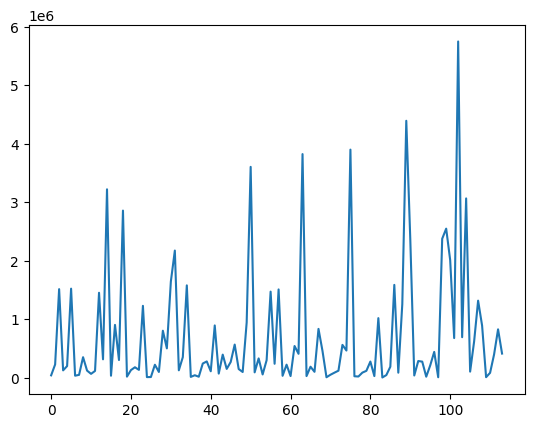

In [49]:
fig, ax = plt.subplots()

ax.plot([i for i in range (y.shape [0]) ], y)
ax.plot([i for i in range (y.shape [0]) ], y_pred ,color ="red")
plt.show()

In [61]:
X

,Year,LP,LTIV,Price_Decay,Price_R2,TIV_Decay,TIV_R2,-1.8364285000041605_,-1.2191416092464593_,-0.6018547184887585_,...,10_poly,11_poly,12_poly,13_poly,14_poly,15_poly,16_poly,17_poly,18_poly,19_poly
0,0.402015,2.297781,2.688829,-1.120221,0.282477,-0.981968,-0.036201,0,0,0,...,1.016719,1.039782,0.026091,0.915334,0.046034,0.919357,1.024281,1.052487,0.194698,0.825415
1,0.402015,2.209180,2.483232,-0.312389,0.471802,-0.944999,0.487788,0,0,0,...,1.000000,1.000000,0.202922,0.938239,0.053888,0.978101,1.000000,1.000000,0.393950,0.862726
2,0.402015,2.172224,2.195472,-0.409148,0.509785,-0.973679,0.683121,0,0,0,...,0.993026,0.944320,0.181742,0.942834,0.047795,1.000000,0.989872,0.926537,0.370084,0.870211
3,-0.603023,2.191353,2.188808,-1.239414,0.982307,-1.198642,0.178327,0,0,0,...,0.996636,0.943030,0.000000,1.000000,0.000000,0.943408,0.994301,0.924137,0.165954,0.962304
4,0.402015,2.019600,1.827317,-0.583918,0.242639,-0.062761,-0.303703,0,0,0,...,0.854438,0.773250,0.246404,0.792245,0.339378,0.758548,0.948046,0.832550,0.326977,0.817564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-1.608061,-1.291558,-1.150069,-0.847848,0.824229,-0.886313,0.529760,0,1,0,...,0.055568,0.043637,0.737888,0.229038,0.759654,0.141830,0.039952,0.071897,0.263093,0.930156
110,-1.608061,-1.370919,-1.144899,-0.721838,0.446227,-0.959629,0.588296,0,1,0,...,0.049578,0.044037,0.748921,0.210746,0.753424,0.144455,0.018225,0.073215,0.294142,0.855736
111,-1.608061,-1.288478,-1.216915,-1.427868,0.664495,-1.300016,0.378991,0,1,0,...,0.055801,0.038463,0.687103,0.221308,0.724497,0.135069,0.040795,0.054848,0.120173,0.898708
112,-1.608061,-1.207636,-1.198590,0.292577,-0.025033,0.168419,0.685359,0,1,0,...,0.061903,0.039881,0.837742,0.187941,0.849288,0.148808,0.062928,0.059522,0.544099,0.762957


In [62]:

#population_size=4000 , generations=100 , hall_of_fame=200 , n_components=10
gp = SymbolicTransformer(generations=generations, population_size=population_size,
hall_of_fame=hall_of_fame, n_components=n_components,
function_set=function_set_trans,
parsimony_coefficient=parsimony_coefficient_trans,
max_samples=0.9, verbose=1,
random_state=0, n_jobs=-1)

gp.fit(X_train, y_train)

gp_features = gp.transform(X)

gp_features_df = pd.DataFrame (gp_features)
gp_features_rename_dict = {}
for col in gp_features_df.columns : gp_features_rename_dict [col] = str (col) + "_"
gp_features_df.rename (gp_features_rename_dict  , axis =1 ,inplace=True)

X = X.join (gp_features_df)
X_train       = X.loc [train_indicies]
X_test        = X.loc [test_indicies]
y_train       = y.loc [train_indicies]
y_test        = y.loc [test_indicies]

reg    = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict (X)




print ( 'reg.score (X,y)'            , reg.score (X,y))
print ('reg.score (X_train,y_train)' , reg.score (X_train,y_train))
print ('reg.score (X_test,y_test)'   , reg.score (X_test,y_test))

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    10.49        0.0814154       39         0.348858         0.125686     17.09s
   1    12.72          0.15788       20         0.387531         0.104589      6.37s
   2    13.38         0.187806       33         0.447514          0.16327      5.61s
   3    15.12         0.201719       20         0.496535         0.626991      5.82s
   4    24.12         0.219704       20         0.534471         0.301336      4.62s
   5    32.14         0.247597       56         0.548805         0.819797      7.13s
   6    37.79         0.284561       69         0.616783         0.225604      4.98s
   7    35.40         0.340355       53         0.642962        0.0231784      2.28s
   8    41.69         0.372287       80         0.678511         0.669253  

In [108]:
X = X.drop (gp_features_df,axis=1)
gp_features = gp.transform(X)
#new_diabetes = np.hstack((diabetes.data, gp_features))

In [109]:
gp_features

array([[-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       ...,
       [ 6.33671200e-01,  3.24361579e-02, -4.63520973e-02, ...,
         1.16854450e-01, -3.68781250e-01, -6.46539509e+09],
       [ 1.36130263e+01, -1.90726409e-01,  1.29236043e-01, ...,
         2.64621619e-01, -4.58797534e-01,  5.72579590e+10],
       [-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00]])

In [110]:
gp_features.shape

(114, 50)

In [111]:
np.hstack((X.values, gp_features))

array([[ 3.28564370e-01,  2.34596186e+00,  2.74680808e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [ 3.28564370e-01,  2.25190746e+00,  2.53291180e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [ 3.28564370e-01,  2.21267622e+00,  2.23353521e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       ...,
       [-1.64282185e+00, -1.46104072e+00, -1.31660130e+00, ...,
         1.16854450e-01, -3.68781250e-01, -6.46539509e+09],
       [-1.64282185e+00, -1.37522237e+00, -1.29753680e+00, ...,
         2.64621619e-01, -4.58797534e-01,  5.72579590e+10],
       [-1.64282185e+00, -1.61922311e+00, -1.27239721e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00]])

In [112]:
gp_features_df = pd.DataFrame (gp_features)
gp_features_rename_dict = {}
for col in gp_features_df.columns : gp_features_rename_dict [col] = str (col) + "_"
gp_features_df.rename (gp_features_rename_dict  , axis =1 ,inplace=True)
gp_features_df

,0_,1_,2_,3_,4_,5_,6_,7_,8_,9_,...,40_,41_,42_,43_,44_,45_,46_,47_,48_,49_
0,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.005451,-0.000000,0.000000,-0.000000,0.000000,...,0.000000,-0.000000,-0.000000,5.450686,0.535502,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
1,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.001406,-0.000000,0.000000,-0.000000,0.000000,...,0.000000,-0.000000,-0.000000,1.405797,0.244633,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
2,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000859,-0.000000,0.000000,-0.000000,0.000000,...,0.000000,-0.000000,-0.000000,0.859032,0.155889,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
3,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.003237,-0.000000,0.000000,-0.000000,0.000000,...,0.000000,-0.000000,-0.000000,3.237149,0.471407,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
4,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2.580641,0.032252,-0.048726,-3616.301567,31.170070,-5072.459452,-2.184131,0.013713,-13192.186709,0.358851,...,0.009172,-0.048726,0.017776,-61112.249672,192.154318,276.894949,-11.504173,0.102855,-0.397141,-2.830884e+10
110,0.731506,-0.025702,0.036232,2104.708103,54.497773,4056.056077,-0.669802,-0.010937,12119.460198,-0.168633,...,-0.007784,0.036232,0.003260,-7107.671363,-65.800995,-206.831756,-25.250262,0.176545,-0.452283,1.180708e+10
111,0.633671,0.032436,-0.046352,-3076.216264,39.019246,-6091.381937,-0.442521,0.009417,-11653.415635,0.526852,...,0.007826,-0.046352,0.002352,-7640.736132,66.766107,267.710815,-14.354730,0.116854,-0.368781,-6.465395e+09
112,13.613026,-0.190726,0.129236,9966.864519,73.666329,10885.320336,-12.780124,-0.050808,41371.048432,-1.571688,...,-0.023536,0.129236,0.039029,-109015.750263,-252.652608,-713.334202,-29.277572,0.264622,-0.458798,5.725796e+10


In [113]:

#X = X.drop (gp_features_df,axis=1)

X = X.join (gp_features_df)
X

,Year,LP,LTIV,Price_Decay,Price_R2,TIV_Decay,TIV_R2,-2.0235481185165343_,-1.3773730890742797_,-0.7311980596320249_,...,40_,41_,42_,43_,44_,45_,46_,47_,48_,49_
0,0.328564,2.345962,2.746808,-1.063660,0.254197,-1.007627,0.142488,0,0,0,...,0.000000,-0.000000,-0.000000,5.450686,0.535502,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
1,0.328564,2.251907,2.532912,-0.279537,0.451914,-0.972083,0.538486,0,0,0,...,0.000000,-0.000000,-0.000000,1.405797,0.244633,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
2,0.328564,2.212676,2.233535,-0.373456,0.491581,-0.999657,0.686106,0,0,0,...,0.000000,-0.000000,-0.000000,0.859032,0.155889,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
3,-0.657129,2.232983,2.226602,-1.179355,0.985050,-1.215951,0.304615,0,0,0,...,0.000000,-0.000000,-0.000000,3.237149,0.471407,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
4,0.328564,2.050659,1.850519,-0.543097,0.212593,-0.123845,-0.059673,0,0,0,...,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-1.642822,-1.464310,-1.247057,-0.799281,0.819965,-0.915658,0.570206,0,1,0,...,0.009172,-0.048726,0.017776,-61112.249672,192.154318,276.894949,-11.504173,0.102855,-0.397141,-2.830884e+10
110,-1.642822,-1.548557,-1.241678,-0.676969,0.425206,-0.986149,0.614444,0,1,0,...,-0.007784,0.036232,0.003260,-7107.671363,-65.800995,-206.831756,-25.250262,0.176545,-0.452283,1.180708e+10
111,-1.642822,-1.461041,-1.316601,-1.362277,0.653149,-1.313418,0.456264,0,1,0,...,0.007826,-0.046352,0.002352,-7640.736132,66.766107,267.710815,-14.354730,0.116854,-0.368781,-6.465395e+09
112,-1.642822,-1.375222,-1.297537,0.307674,-0.066945,0.098426,0.687798,0,1,0,...,-0.023536,0.129236,0.039029,-109015.750263,-252.652608,-713.334202,-29.277572,0.264622,-0.458798,5.725796e+10


In [63]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict (X)

In [64]:
reg.score (X,y)

-9.000463985718417

In [116]:
X_train       = X.loc [train_indicies]
X_test        = X.loc [test_indicies]
y_train       = y.loc [train_indicies]
y_test        = y.loc [test_indicies]

In [65]:
reg.score (X_train,y_train)

0.9505300237791671

In [66]:
reg.score (X_test,y_test)

-27.16903559731706

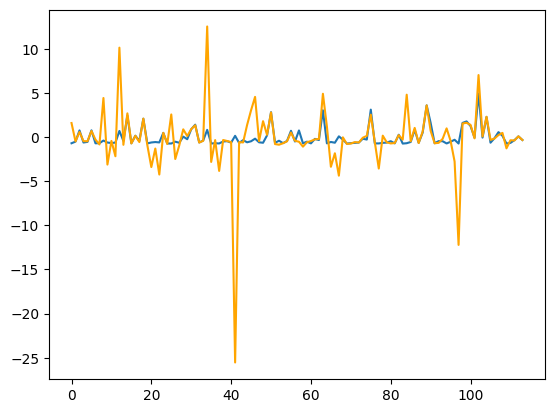

In [67]:
fig, ax = plt.subplots()

ax.plot([i for i in range (y.shape [0]) ], y)
ax.plot([i for i in range (y.shape [0]) ], y_pred ,color ="orange")
plt.show()

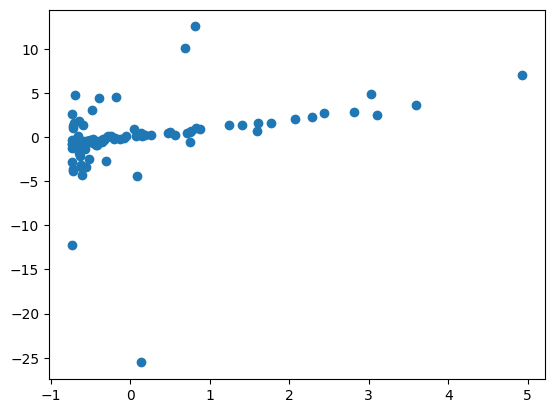

In [68]:
fig, ax = plt.subplots()

ax.scatter(y,y_pred)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

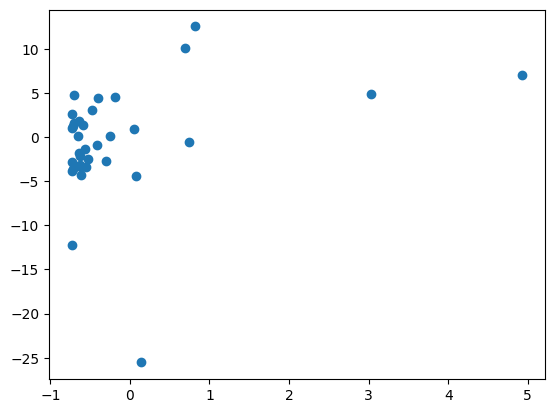

In [69]:
fig, ax = plt.subplots()

ax.scatter(y.loc [test_indicies],pd.Series (y_pred).loc[test_indicies])
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

In [122]:
# Creating and training the symbolic regressor
#parsimony_coefficient=0.0001 ,  generations=50
function_set = ['add', 'sub', 'mul', 'div' , 'sqrt', 'log', 'abs', 'neg', 'inv']
est_gp = SymbolicRegressor(population_size=10000,
                           generations=5, stopping_criteria=0.1,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.1, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           function_set=function_set,
                           parsimony_coefficient=0.00000000000001, random_state=0,n_jobs=-1)
est_gp.fit(X, y)



    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     8.38      1.77874e+22        4          0.53947          0.85718     25.04s
   1     6.60      5.36263e+17       29          0.49823          1.30843     27.55s
   2     6.94      1.54325e+12        2         0.505548          1.71147     20.42s
   3     7.59      5.56695e+11       10         0.474133          1.35068      8.46s
   4     8.50      1.08291e+12        4         0.454699          1.57774      0.00s


SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'abs', 'neg', 'inv'],
                  generations=5, max_samples=0.9, n_jobs=-1, p_crossover=0.7,
                  p_hoist_mutation=0.1, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, parsimony_coefficient=1e-14,
                  population_size=10000, random_state=0, stopping_criteria=0.1,
                  verbose=1)

In [123]:
# Making predictions
y_pred_g = est_gp.predict(X)

# Evaluating the model
print("Model expression:", est_gp._program)
print("Mean Squared Error:", mean_squared_error(y, y_pred_g))


Model expression: sub(X59, abs(0.402))
Mean Squared Error: 1.102181748859987


In [124]:
est_gp.score(X,y)

-0.10218174885998699

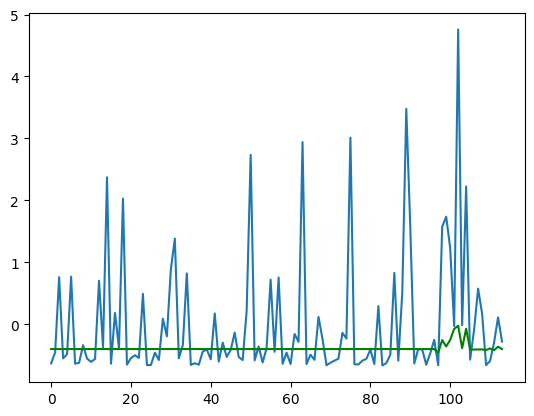

In [125]:
fig, ax = plt.subplots()

ax.plot([i for i in range (y.shape [0]) ], y)
ax.plot([i for i in range (y.shape [0]) ], y_pred_g ,color ="green")
plt.show()

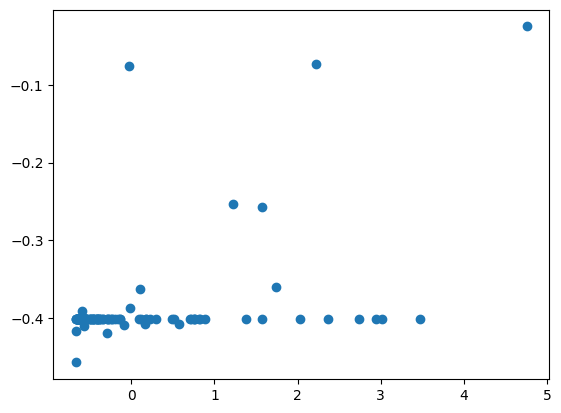

In [126]:
fig, ax = plt.subplots()

ax.scatter(y,y_pred_g)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

In [127]:
X.shape [0] // number_of_test_per_fold

114

In [128]:
kf              = KFold(n_splits=X.shape [0] // number_of_test_per_fold , shuffle= True )

fold_number     = 0

kfold_pred_dict = {fold_test_index :np.array([])  ,
                   fold_y_pred     : np.array ([]) ,
                   }

kfold_pred_list = []
model_NN = MLPRegressor(
    hidden_layer_sizes=(250, 200, 100, 100,100),  # More layers and different numbers of neurons
    activation='tanh',  # Different activation function
    solver='sgd',  # Different optimizer
    learning_rate_init=0.01,  # Initial learning rate
    learning_rate='adaptive',  # Adaptive learning rate
    max_iter=1000,  # More iterations
    batch_size=64,  # Smaller batch size
    alpha=0.0001,  # L2 regularization
    early_stopping=True,  # Enable early stopping
    n_iter_no_change=20,  # Patience for early stopping
    random_state=0
)

for i, (train_index, test_index) in enumerate(kf.split(X)):
      print(f"Fold {i}:")
      print(f"  Train: index={train_index}")
      print(f"  Test:  index={test_index}")

      X_train_fold  = X.loc [train_index]
      X_test_fold   = X.loc [test_index]

      y_train_fold  = y.loc [train_index]
      y_test_fold   = y.loc [test_index]

      reg_fold = LinearRegression().fit(X_train_fold, y_train_fold)
      #reg_fold = model_NN.fit(X_train_fold, y_train_fold)

      fold_y_pred_value = scaler_dict [Target].inverse_transform (reg_fold.predict (X_test_fold).reshape (-1,1))

      kfold_pred_dict [fold_test_index] =  test_index
      kfold_pred_dict [fold_y_pred]     =  fold_y_pred_value.reshape (-1)
      kfold_pred_dict [fold_num ]       =  i

      kfold_pred_list.append (pd.DataFrame ( kfold_pred_dict))


      print ( kfold_pred_dict)

kfold_pred_df = pd.concat (kfold_pred_list)


Fold 0:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 107 108
 109 110 111 112 113]
  Test:  index=[106]
{'fold_test_index': array([106]), 'fold_y_pred': array([-7.93155962e+08]), 'fold_num': 0}
Fold 1:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  

In [129]:
data_input = data_input.merge (kfold_pred_df.set_index (fold_test_index) , how = "left" , left_index = True , right_index = True)
data_input

,LPB,MMC,Year,LP,LTIV,PC,Price_Decay,Price_R2,TIV_Decay,TIV_R2,Profit,Profit_Pred,fold_y_pred,fold_num
0,1000,iPhone XS Max_512GB_Verizon,2018,1029.35,656.816,19,-0.001192,0.894662,-0.001335,0.879887,41381,-531899.697988,-2.291341e+06,9
1,1000,iPhone XS Max_512GB_Unlocked,2018,1014.39,634.388,20,-0.001009,0.911918,-0.001326,0.918513,227473,790518.041632,9.519541e+05,92
2,1000,iPhone XS Max_256GB_Unlocked,2018,1008.15,602.997,20,-0.001031,0.915380,-0.001333,0.932912,1514777,736038.014269,2.593205e+05,109
3,1000,iPhone X_256GB_Verizon,2017,1011.38,602.270,19,-0.001220,0.958448,-0.001388,0.895701,126462,915436.593137,-6.221203e+05,48
4,900,iPhone XS Max_256GB_Verizon,2018,982.38,562.836,20,-0.001070,0.891031,-0.001114,0.860168,199737,-786018.700838,6.485786e+06,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,400,iPhone 7_256GB_T-Mobile,2016,423.30,238.041,17,-0.001130,0.944040,-0.001312,0.921607,9867,535338.497667,-9.084934e+09,35
110,400,iPhone 7_128GB_T-Mobile,2016,409.90,238.605,19,-0.001102,0.909587,-0.001330,0.925922,84340,427041.757517,-4.666813e+09,4
111,400,iPhone 7_32GB_AT&T,2016,423.82,230.749,20,-0.001262,0.929481,-0.001412,0.910493,397857,481107.547500,9.407326e+09,70
112,400,iPhone 7 Plus_32GB_T-Mobile,2016,437.47,232.748,19,-0.000871,0.866634,-0.001058,0.933077,827457,676207.107730,7.003193e+09,51


In [130]:
kfold_pred_df.shape

(114, 3)

In [131]:
kfold_pred_df [fold_test_index].duplicated().sum ()

0

<Axes: xlabel='Profit', ylabel='fold_y_pred'>

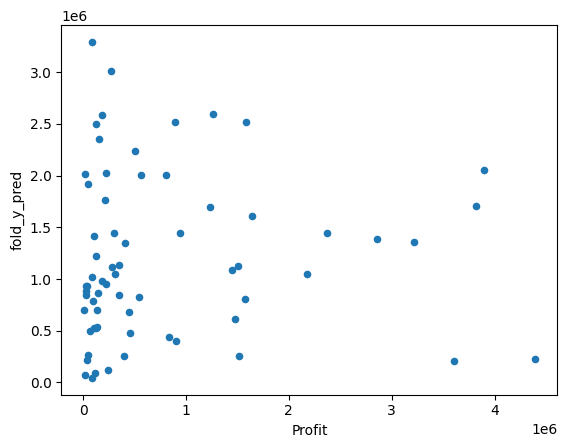

In [132]:
data_input [(data_input [fold_y_pred] < data_input [Target].max() ) *
            (data_input [fold_y_pred] > data_input [Target].min() )
             ].plot.scatter (Target , fold_y_pred)

         Year        LP      LTIV  Price_Decay  Price_R2  TIV_Decay    TIV_R2
0    0.328564  2.345962  2.746808    -1.063660  0.254197  -1.007627  0.142488
1    0.328564  2.251907  2.532912    -0.279537  0.451914  -0.972083  0.538486
2    0.328564  2.212676  2.233535    -0.373456  0.491581  -0.999657  0.686106
3   -0.657129  2.232983  2.226602    -1.179355  0.985050  -1.215951  0.304615
4    0.328564  2.050659  1.850519    -0.543097  0.212593  -0.123845 -0.059673
..        ...       ...       ...          ...       ...        ...       ...
109 -1.642822 -1.464310 -1.247057    -0.799281  0.819965  -0.915658  0.570206
110 -1.642822 -1.548557 -1.241678    -0.676969  0.425206  -0.986149  0.614444
111 -1.642822 -1.461041 -1.316601    -1.362277  0.653149  -1.313418  0.456264
112 -1.642822 -1.375222 -1.297537     0.307674 -0.066945   0.098426  0.687798
113 -1.642822 -1.619223 -1.272397    -1.355946  0.602780  -1.676351  0.532734

[114 rows x 7 columns]
Fold 0:
  Train: index=[  0   1   2   3 

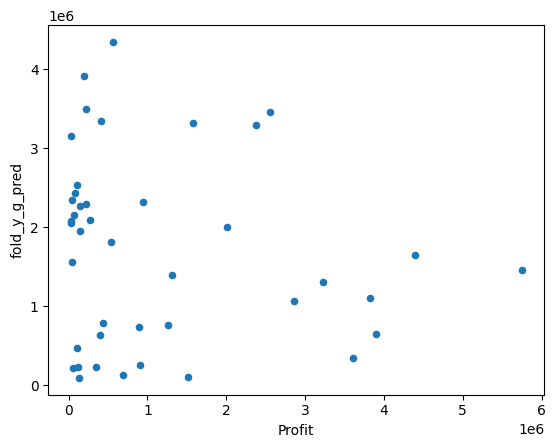

In [66]:

if Kfold_symbolic :
    kf              = KFold(n_splits=X.shape [0] // number_of_test_per_fold , shuffle= True )

    fold_number     = 0

    kfold_pred_dict = {fold_test_index :np.array([])  ,
                      fold_y_g_pred      : np.array ([]) ,
                      }

    kfold_pred_list = []


    for i, (train_index, test_index) in enumerate(kf.split(X)):
          if gp_features_df.columns [0] in X.columns :
            X = X.drop (gp_features_df,axis =1)
          if interaction_df.columns [0] in X.columns :
            X = X.drop (interaction_df,axis =1)
          print (X)
          print(f"Fold {i}:")
          print(f"  Train: index={train_index}")
          print(f"  Test:  index={test_index}")

          X_train_fold  = X.loc [train_index]
          X_test_fold   = X.loc [test_index]

          y_train_fold  = y.loc [train_index]
          y_test_fold   = y.loc [test_index]

          gp = SymbolicTransformer(generations=generations, population_size=population_size,
          hall_of_fame=hall_of_fame, n_components=n_components,
          function_set=function_set_trans,
          parsimony_coefficient=parsimony_coefficient_trans,
          max_samples=0.9, verbose=1,
          random_state=0, n_jobs=-1)

          gp.fit(X_train_fold, y_train_fold)

          gp_features = gp.transform(X)

          gp_features_df = pd.DataFrame (gp_features)
          gp_features_rename_dict = {}
          for col in gp_features_df.columns : gp_features_rename_dict [col] = str (col) + "_"
          gp_features_df.rename (gp_features_rename_dict  , axis =1 ,inplace=True)

          X = X.join (gp_features_df)

          poly           = PolynomialFeatures(2,interaction_only=False)
          interaction_df = pd.DataFrame ( poly.fit_transform(X) )
          interaction_df_rename_dict = {}
          for col in interaction_df.columns : interaction_df_rename_dict [col] = str (col) + "_poly"
          interaction_df.rename (interaction_df_rename_dict,axis =1, inplace=True)
          sel_col_indicies        = [ random.randint (0, interaction_df.shape [1]-X.shape [1] -1) for _ in range (int (interaction_df.shape [1] * 0.01))]
          print (interaction_df.shape)
          interaction_df  = interaction_df.T.drop_duplicates().T
          interaction_df  = interaction_df.iloc [:,sel_col_indicies]

          X = X.join (interaction_df)

          X_train_fold  = X.loc [train_index]
          X_test_fold   = X.loc [test_index]

          y_train_fold  = y.loc [train_index]
          y_test_fold   = y.loc [test_index]

          reg_fold = LinearRegression().fit(X_train_fold, y_train_fold)
          #reg_fold = est_gp.fit(X_train_fold, y_train_fold)
          #reg_fold = model_NN.fit(X_train_fold, y_train_fold)

          fold_y_pred_value = scaler_dict [Target].inverse_transform (reg_fold.predict (X_test_fold).reshape (-1,1))

          kfold_pred_dict [fold_test_index]   =  test_index
          kfold_pred_dict [fold_y_g_pred]     =  fold_y_pred_value.reshape (-1)
          kfold_pred_dict [fold_num ]         =  i

          kfold_pred_list.append (pd.DataFrame ( kfold_pred_dict))



          print ( kfold_pred_dict)

    kfold_pred_df = pd.concat (kfold_pred_list)

    data_input = data_input.merge (kfold_pred_df.set_index (fold_test_index) , how = "left" , left_index = True , right_index = True)

    data_input [(data_input [fold_y_g_pred ] < data_input [Target].max() ) *
            (data_input [fold_y_g_pred ] > data_input [Target].min() )
             ].plot.scatter (Target , fold_y_g_pred )
